In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [2]:
import quick_pp.las_handler as las

well_name = '15-9-19-SR'
with open(rF'data\01_raw\VOLVE\{well_name}.las', 'rb') as f:
    df, header = las.read_las_files([f])

c:\projects\quick_pp\.venv\Lib\site-packages\lasio\las_version.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [3]:
df.columns

Index(['UWI', 'WELL_NAME', 'DEPTH', 'CALI', 'DT', 'GR', 'NPHI', 'RHOB', 'RT',
       'DTS', 'SAND_FLAG', 'COAL', 'KLOGH', 'PHIF', 'SW', 'VSH', 'KLOGV',
       'BWV'],
      dtype='object')

<Axes: xlabel='DEPTH'>

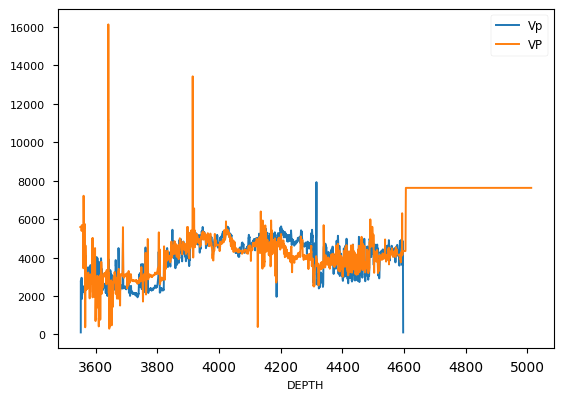

In [4]:
from quick_pp.rock_physics.geomechanics import *

df_copy = df.copy()

df_copy['Vp'] = estimate_compressional_velocity(df_copy['RHOB'].clip(1, 3))
df_copy['VP'] = 1 / df_copy['DT'] * ( 1e6 / 3.281)

df_copy.plot(x='DEPTH', y=['Vp', 'VP'])

<Axes: xlabel='DEPTH'>

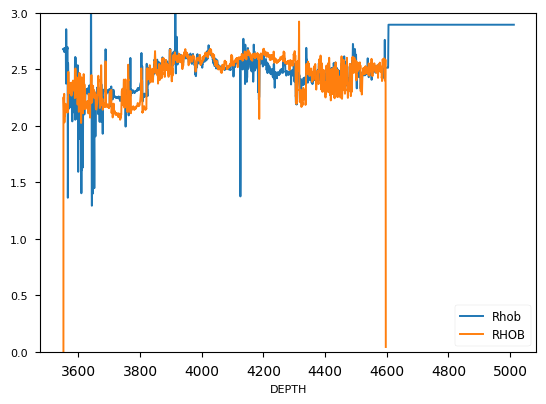

In [5]:
df_copy['Rhob'] = estimate_gardner_density(1 / df_copy['DT'] * (1e6 / 3.281))

df_copy.plot(x='DEPTH', y=['Rhob', 'RHOB'], ylim=(0, 3))

In [6]:
df_copy.columns

Index(['UWI', 'WELL_NAME', 'DEPTH', 'CALI', 'DT', 'GR', 'NPHI', 'RHOB', 'RT',
       'DTS', 'SAND_FLAG', 'COAL', 'KLOGH', 'PHIF', 'SW', 'VSH', 'KLOGV',
       'BWV', 'Vp', 'VP', 'Rhob'],
      dtype='object')

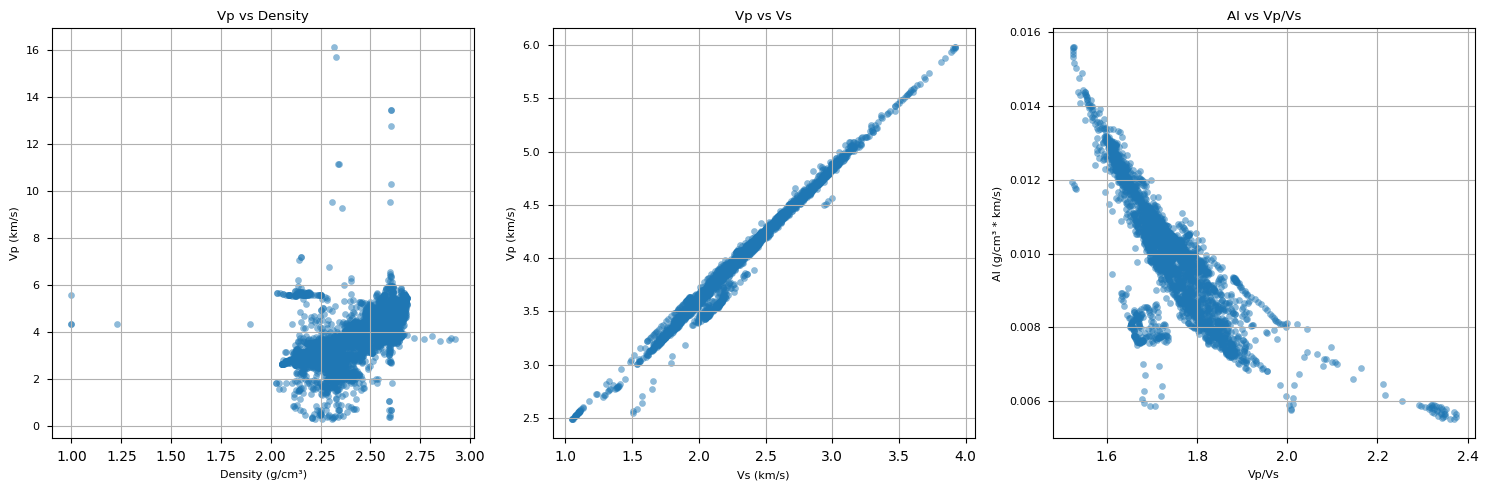

In [9]:
from quick_pp.rock_physics.rpm import *

vs= 1 / df_copy['DTS'] * (1e6 / 3.281)
vp = 1 / df_copy['DT'] * (1e6 / 3.281)
rhob = df_copy['RHOB'].clip(1, 3)
fig = qaqc_xplots(rhob, vp, vs)

In [25]:
vp.describe()

count    11699.0000000000
mean      4977.0104062398
std       1821.8721866711
min        303.2422300195
25%       3715.4420656835
50%       4408.1103713642
75%       7619.6281621457
max      16114.1754820915
Name: DT, dtype: float64

[132.74193548 134.65740353 136.57287157 138.48833962 140.40380766
 142.31927571 144.23474375 146.1502118  148.06567984 149.98114788
 151.89661593 153.81208397 155.72755202 157.64302006 159.55848811
 161.47395615 163.3894242  165.30489224 167.22036028 169.13582833
 171.05129637 172.96676442 174.88223246 176.79770051 178.71316855
 180.6286366  182.54410464 184.45957269 186.37504073 188.29050877
 190.20597682 192.12144486 194.03691291 195.95238095 197.867849
 199.78331704 201.69878509 203.61425313 205.52972117 207.44518922
 209.36065726 211.27612531 213.19159335 215.1070614  217.02252944
 218.93799749 220.85346553 222.76893358 224.68440162 226.59986966
 228.51533771 230.43080575 232.3462738  234.26174184 236.17720989
 238.09267793 240.00814598 241.92361402 243.83908206 245.75455011
 247.67001815 249.5854862  251.50095424 253.41642229 255.33189033
 257.24735838 259.16282642 261.07829447 262.99376251 264.90923055
 266.8246986  268.74016664 270.65563469 272.57110273 274.48657078
 276.4020388

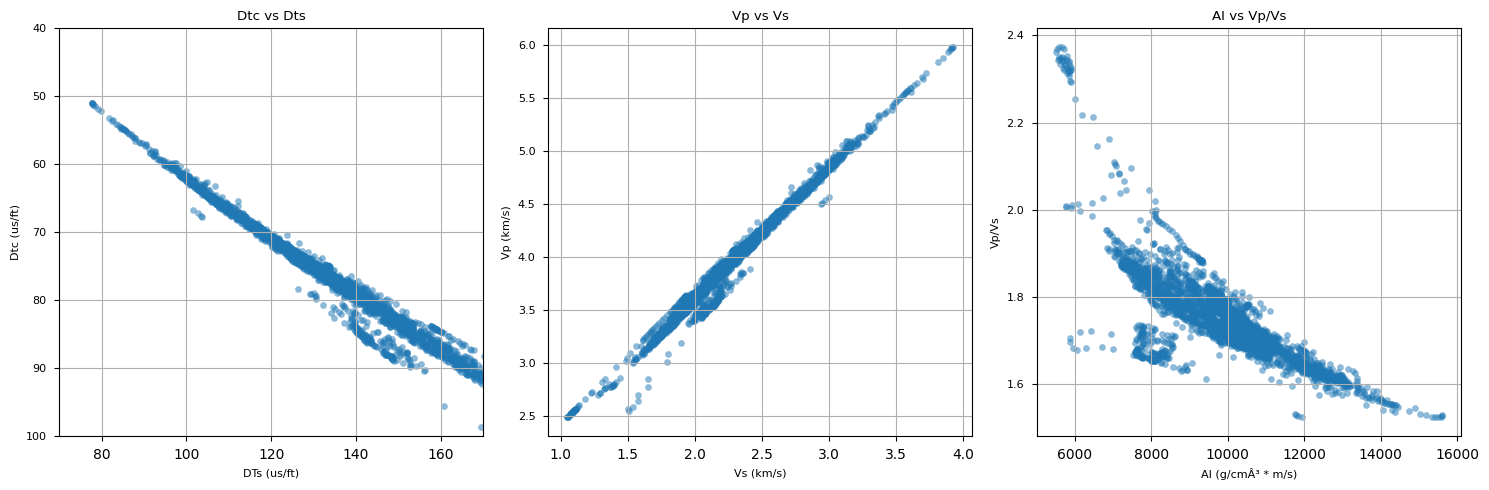

In [26]:
fig = fluid_typing_xplots(rhob, vp, vs)